**Data Science Assignment**
---
---
Dataset: Hotel Booking Demand

[Kaggle Link](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

32 Attributes with 119390 records

The dataset is responsible to describe various data from multiple properties of hotels



## **0. Import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/MyDrive/DS_Assignment"

/content/gdrive/MyDrive/DS_Assignment


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314933 sha256=be9d8aeb871542f1d1d294d7b80dc993b94a4c9f61d80b58d7776771c085ca89
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
%%R
library(ggplot2)
library(dplyr)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




## **1. Preparation and quick view on dataset**

### 1.1 Check for any anomalies

In [ ]:
hotel_bookings = pd.read_csv("hotel_bookings.csv")

hotel_bookings.describe()

hotel = hotel_bookings.copy()

The info() function helps showing the details of each attributes and their own data types.

We can observe '**is_canceled**' might be the most important dependent variable. There are some other independent variables also important to maximize the profit of a hotels, such as '**deposit_type**', '**types of hotel**', '**adr**', '**market_segment**' and so on. This project is created to reveal the relationship, at least the correlation between these variables. Eventually, there will be a proper guideline to operate a hotel with a good and steady profit in Portugal.

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
%R -i hotel_bookings

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


The dataset contains 20 quantitative attributes and 12 qualitative attributes

In [ ]:
%R glimpse(hotel_bookings)


Rows: 119,390
Columns: 32
$ hotel                          <chr> "Resort Hotel", "Resort Hotel", "Resort…
$ is_canceled                    <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, …
$ lead_time                      <int> 342, 737, 7, 13, 14, 14, 0, 9, 85, 75, …
$ arrival_date_year              <int> 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ arrival_date_month             <chr> "July", "July", "July", "July", "July",…
$ arrival_date_week_number       <int> 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,…
$ arrival_date_day_of_month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ stays_in_weekend_nights        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ stays_in_week_nights           <int> 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, …
$ adults                         <int> 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ children                       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ babies                         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ meal        

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
%%R summary(hotel_bookings) #same function as python describe()

    hotel            is_canceled       lead_time   arrival_date_year
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69   Median :2016     
                    Mean   :0.3704   Mean   :104   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737   Max.   :2017     
                                                                    
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119390      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.17            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Ma

<Axes: xlabel='booking_changes'>

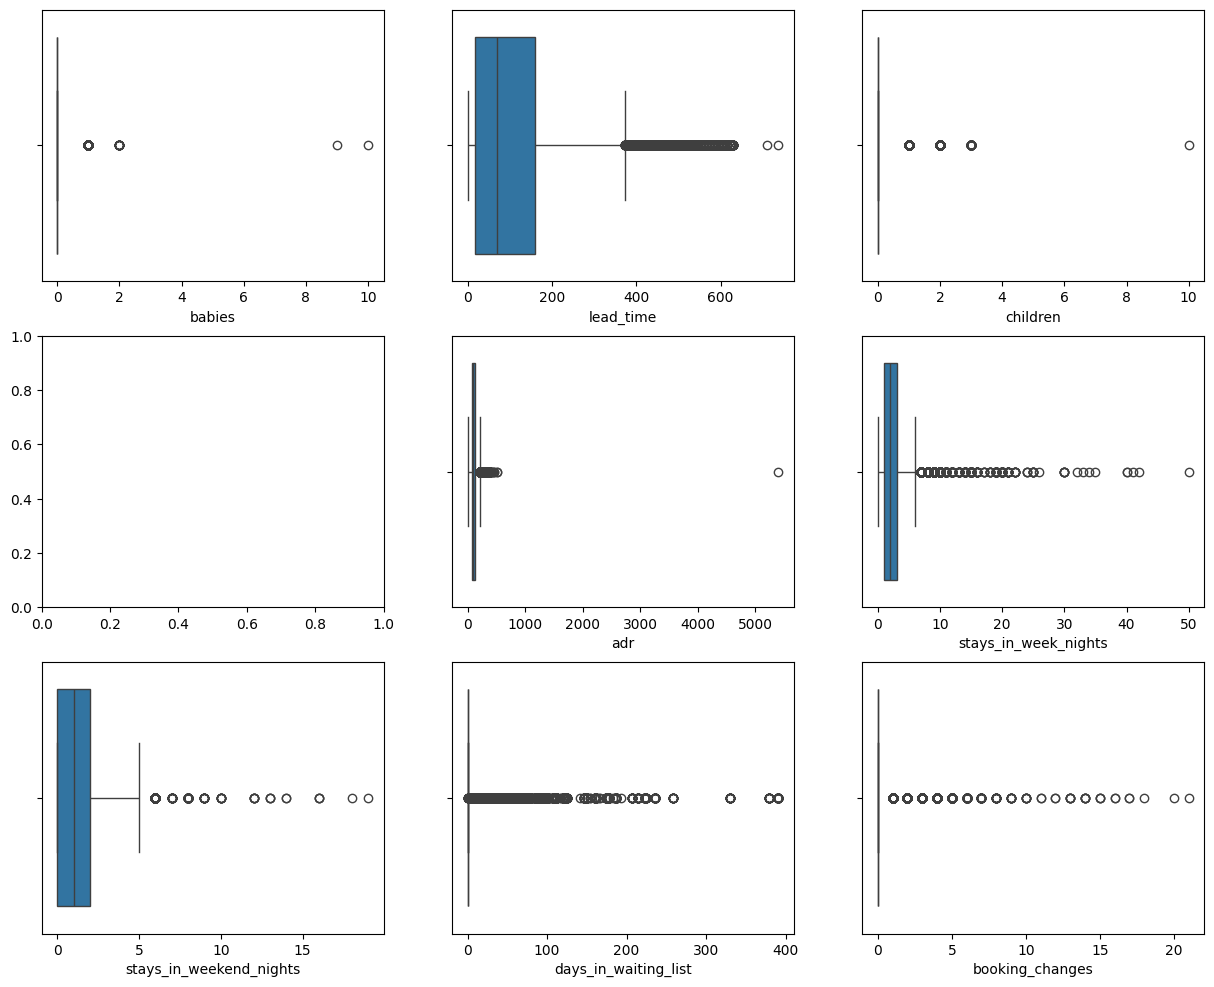

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

sns.boxplot(hotel_bookings, x = 'babies', ax=axes[0,0])
sns.boxplot(hotel_bookings, x = 'lead_time', ax=axes[0,1])
sns.boxplot(hotel_bookings, x ='children', ax=axes[0,2])
sns.boxplot(hotel_bookings, x='adr', ax=axes[1,1])
sns.boxplot(hotel_bookings, x='stays_in_week_nights', ax=axes[1,2])
sns.boxplot(hotel_bookings, x='stays_in_weekend_nights', ax=axes[2,0])
sns.boxplot(hotel_bookings, x='days_in_waiting_list', ax=axes[2,1])
sns.boxplot(hotel_bookings, x='booking_changes', ax=axes[2,2])





### 1.2 Check for any missing values

In [ ]:
%%R anyNA(hotel_bookings)

[1] TRUE


                                        0
hotel                            0.000000
is_canceled                      0.000000
lead_time                        0.000000
arrival_date_year                0.000000
arrival_date_month               0.000000
arrival_date_week_number         0.000000
arrival_date_day_of_month        0.000000
stays_in_weekend_nights          0.000000
stays_in_week_nights             0.000000
adults                           0.000000
children                         0.003350
babies                           0.000000
meal                             0.000000
country                          0.408744
market_segment                   0.000000
distribution_channel             0.000000
is_repeated_guest                0.000000
previous_cancellations           0.000000
previous_bookings_not_canceled   0.000000
reserved_room_type               0.000000
assigned_room_type               0.000000
booking_changes                  0.000000
deposit_type                     0

<Axes: title={'center': 'Missing values in percentage'}, ylabel='percentage'>

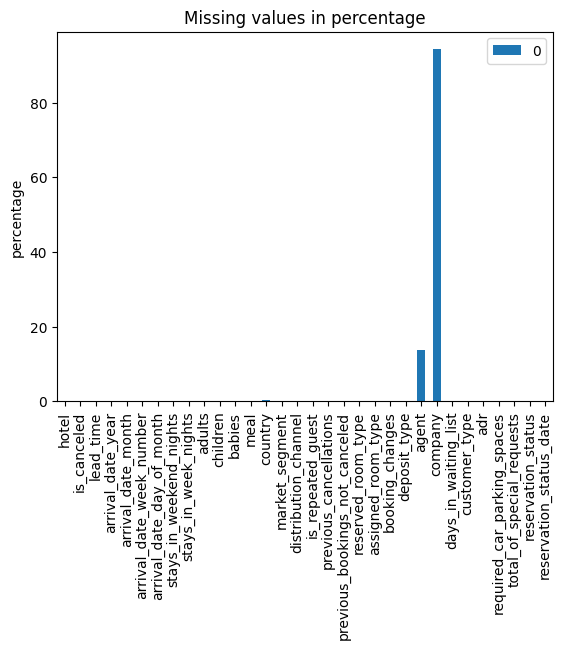

In [ ]:
miss_vals=pd.DataFrame(hotel_bookings.isnull().sum()/ len(hotel_bookings) * 100)
print(miss_vals)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')

### Summary of Chapter 1:

We can observe that there might be anomalies in several attributes:**bold text**. Then, some of the attributes: **Company, Agent and Country** contain NA value which makes summarization operation invalid.

Thus, preprocessing of the dataset is required to sure the data is clean and not misleading.

## **2. Preprocessing of dataset**

### 2.1 Handling missing values

Attributes that have missing value: childeren, country, agent and company.

---

Instead of just dropping the column, we can assume that if there is no company or agent mentioned in the dataset, then most likely it will be a private booking. For the country, we can consider to fill in with character 'unknown'. While for the children, it is fine to marginalise as there are only 4 rows with missing children value.

In [ ]:
hotel = hotel_bookings.copy() #Obtain deep copy of original dataset, do not manipulate the original set

In [ ]:
type(hotel)

pandas.core.frame.DataFrame

In [ ]:
hotel = hotel.fillna({"country": "Unknown", "agent": 0, "company": 0}) # Fill in the NA according to the assumption

In [ ]:
hotel = hotel.dropna(axis = 0) # drop rows with missing children record
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [ ]:
hotel.isnull().sum() # Check again for NA/Null

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
hotel.shape # Original rows: 119390 After marginalization: 119386

(119386, 32)

The missing values situation is settled.




Through the manual inspection, there is also one type weird and mysterious records found, showing 0 adults, 0 children and 0 babies. These records is meaningless to the analysis.

Therefore, we performed the marginalisation to them. There are 180 rows going to be marginalized.

In [ ]:
hotel.loc[hotel["adults"]+hotel["children"]+hotel["babies"]==0].index


Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=180)

In [ ]:
zero_guests = list(hotel.loc[hotel["adults"]
                   + hotel["children"]
                   + hotel["babies"]==0].index) # Original type: pandas.core.indexes.numeric.Int64Index Therefore need to transform it to a list

hotel.drop(hotel.index[zero_guests], inplace=True)

In [ ]:
filter = (hotel.children == 0) & (hotel.adults == 0) & (hotel.babies == 0)

hotel_1 = hotel[~filter]

In [ ]:
print(len(hotel))
print(len(hotel_1))

119206
119041


Special case has been handled

### 2.2 Handling Outliers

In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000
mean,0.370686,104.066498,2016.156485,27.163448,15.799373,0.927764,2.500956,1.856693,0.103938,0.007944,0.031878,0.087185,0.136981,0.220878,74.905038,10.758359,2.322685,101.844854,0.062572,0.571246
std,0.482991,106.887834,0.707465,13.601549,8.781425,0.998791,1.908602,0.578975,0.398691,0.097426,0.175675,0.844928,1.497842,0.651664,107.186018,53.885033,17.601236,50.541746,0.245393,0.792770
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.220000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.595000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel.loc[hotel.lead_time> 600,'lead_time'] = 600
hotel.loc[hotel.adr > 5000,'adr'] = 500.00
hotel.loc[hotel.babies > 8,'babies'] = 0
hotel.loc[hotel.children >8,'children'] = 0
hotel.loc[hotel.stays_in_weekend_nights >  5,'stays_in_weekend_nights'] =5
hotel.loc[hotel.stays_in_week_nights >20,'stays_in_week_nights']=20
hotel.loc[hotel.days_in_waiting_list >180,'days_in_waiting_list'] =180
hotel.loc[hotel.booking_changes>10,'booking_changes']=10


In [ ]:
%R -i hotel

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.00000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000,119206.000000
mean,0.370686,104.045937,2016.156485,27.163448,15.799373,0.922839,2.49849,1.856693,0.103854,0.007785,0.031878,0.087185,0.136981,0.219947,74.905038,10.758359,2.137929,101.803749,0.062572,0.571246
std,0.482991,106.789283,0.707465,13.601549,8.781425,0.967949,1.87663,0.578975,0.397660,0.089308,0.175675,0.844928,1.497842,0.633146,107.186018,53.885033,14.717779,48.169657,0.245393,0.792770
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.220000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.595000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,600.000000,2017.000000,53.000000,31.000000,5.000000,20.00000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,10.000000,535.000000,543.000000,180.000000,510.000000,8.000000,5.000000


In [ ]:
hotel.reset_index(drop=True, inplace=True)

In [ ]:
hotel_bookings.info()
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **3. EDA**
Now, the dataset is having a new shape after preprocessing: (119206,32)


In [ ]:
%%R -i hotel

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


NULL


### **3.1 Distribution of Hotel**

Only consider the booking record that has not been cancelled.

   Total # of guests  cancel
0              75018       0
1              44188       1


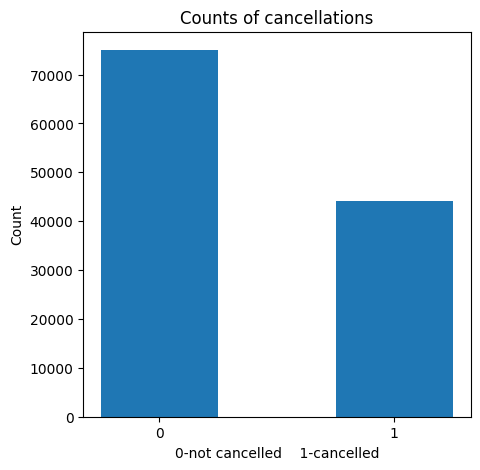

In [ ]:
#total_cancelations = hotel["is_canceled"].sum()
#total_cancelation = hotel.loc[hotel['is_canceled']==1]
#print("Percentage of cancelations:",len(total_cancelation)/len(hotel)*100,"%")
#canceled_data = pd.DataFrame(hotel['is_canceled'])
#sns.countplot(data = canceled_data, x = 'is_canceled')
#plt.show()

cancel_data = pd.DataFrame(hotel["is_canceled"].value_counts())
cancel_data.rename(columns={"is_canceled": "Total # of guests"}, inplace=True)
cancel_data["cancel"] = cancel_data.index

print(cancel_data)


plt.figure(figsize=(5,5))
plt.bar(cancel_data["cancel"],cancel_data["Total # of guests"],width=0.5)
plt.xticks([0, 1])
plt.xlabel("0-not cancelled    1-cancelled")
plt.ylabel("Count")
plt.title("Counts of cancellations")
plt.show()

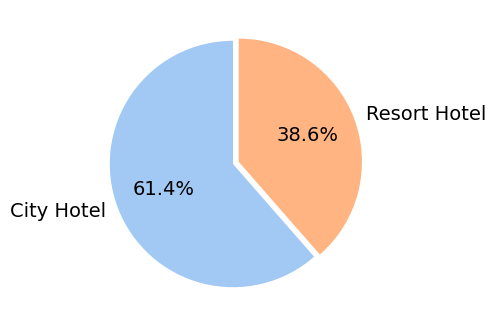

In [ ]:
labels = hotel.loc[hotel["is_canceled"]==0]['hotel'].value_counts().index.tolist()
plt.rcParams['figure.figsize'] = 4,4
sizes = hotel.loc[hotel["is_canceled"]==0]['hotel'].value_counts().tolist()
explode = [0, 0.05]
colors =  sns.color_palette('pastel')[0:5]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

### **Conclusion** chapter 3.1

1.   More than half the hotel is a city hotel.
2.   Insufficient to extract insights.



### **3.2 Understanding the guests of hotel**

#### Origin of guests

There are too many different categories of origin of guests, it is better for the stakeholder to look at the visualized form. Note that we only include the guests that were not cancelled the bookings.

In [ ]:
country_data = pd.DataFrame(hotel.loc[hotel["is_canceled"] == 0][hotel["hotel"]== 'City Hotel']["country"].value_counts())
#print(country_data)
country_data.rename(columns={"country": "Total # of guests"}, inplace=True)
country_data["country"] = country_data.index

#print(country_data)

#labels = country_data.index
#plt.rcParams['figure.figsize'] = 10,10
#sizes = country_data.iloc[0:,0]
#keys = [country_data.iloc[0:,0]]
#colors =  sns.color_palette('pastel')[0:5]

#fig = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14},labeldistance = 0.5)

<ipython-input-35-4a400a099ca5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_data = pd.DataFrame(hotel.loc[hotel["is_canceled"] == 0][hotel["hotel"]== 'City Hotel']["country"].value_counts())


This is too ugly

In [ ]:
fig = px.pie(country_data, values='Total # of guests', names='country', title='Country of guests')
fig.update_traces(textposition="inside",textinfo="value+percent+label")
fig.show()

In [ ]:
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color = 'Total # of guests',
                    hover_name=country_data.index,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

These two visualization should get us the insight that the majority of the guests of hotel in Portugal are from Western Europe. Therefore, our client(someone who is interested to operate hospitality service in Portugal) can consider to decorate the hotel room with styles that are more culturally preferred by them such as Mediterranean, Scandinavian and so on. Moreover, client can also put attention on the topic of dietary preference of western european such as cuisine from different cultures to maintain the diversity. Yet, client should also not to ignore the importance of guests from countries other than western europe as the dissemination of information in our world is too fast so must be prepared to adapt to changes of the trend.

#### Types of guests

In [ ]:
customer_data = pd.DataFrame(hotel.loc[hotel["is_canceled"] == 0]["customer_type"].value_counts())
customer_data.rename(columns={"customer_type": "Total # of guests"}, inplace=True)
customer_data["customer_type"] = customer_data.index

customer_summary = hotel[hotel['is_canceled']==0]['customer_type'].value_counts()
customer_summary_normalized = hotel[hotel['is_canceled']==0]['customer_type'].value_counts(normalize=True)
print(customer_summary)
print(customer_summary_normalized)

Transient          52983
Transient-Party    18707
Contract            2812
Group                516
Name: customer_type, dtype: int64
Transient          0.706270
Transient-Party    0.249367
Contract           0.037484
Group              0.006878
Name: customer_type, dtype: float64


In [ ]:
fig = px.bar(data_frame = customer_data,  x = 'customer_type', y = "Total # of guests", title='Customer Types',color = 'Total # of guests')
fig.show()


In [ ]:
meal_summary = hotel[hotel['is_canceled']==0]['meal'].value_counts()
meal_summary_normalized = hotel[hotel['is_canceled']==0]['meal'].value_counts(normalize=True)
print(meal_summary)
print(meal_summary_normalized)


meal_data = pd.DataFrame(hotel.loc[hotel["is_canceled"] == 0]["meal"].value_counts())
meal_data.rename(columns={"meal": "Total # of guests"}, inplace=True)
meal_data["meal"] = meal_data.index

fig = px.bar(data_frame = meal_data,  x = 'meal', y = 'Total # of guests', title='Meal Types',color = 'Total # of guests')
fig.show()

BB           57692
HB            9469
SC            6654
Undefined      883
FB             320
Name: meal, dtype: int64
BB           0.769042
HB           0.126223
SC           0.088699
Undefined    0.011771
FB           0.004266
Name: meal, dtype: float64


#### Market Segment

In [ ]:
marketseg_data = hotel[hotel['is_canceled']==0]['market_segment'].value_counts().reset_index()
marketseg_data.columns = ['Market segment','Market size']
marketseg_data_normalized = hotel[hotel['is_canceled']==0]['market_segment'].value_counts(normalize=True).reset_index()
marketseg_data_normalized.columns = ['Market segment','Market size']
print(marketseg_data)
print(marketseg_data_normalized)

  Market segment  Market size
0      Online TA        35666
1  Offline TA/TO        15885
2         Direct        10646
3         Groups         7698
4      Corporate         4295
5  Complementary          643
6       Aviation          185
  Market segment  Market size
0      Online TA     0.475433
1  Offline TA/TO     0.211749
2         Direct     0.141913
3         Groups     0.102615
4      Corporate     0.057253
5  Complementary     0.008571
6       Aviation     0.002466


In [ ]:
fig = px.pie(marketseg_data, values='Market size', names='Market segment', title='Market Segment')
fig.update_traces(textposition="inside",textinfo="value+percent+label")
fig.show()

### **Conclusion** of Chapter 3.2



1.   List item
2.   List item



### **3.3 Comparison of Hotels**

Remember that our aim is to find out what makes a hotel good, so first we have to do a comparison between two different types of hotel to explore which of them is more preferred by guests and meanwhile can guarantee the profit.

In [ ]:
resort = hotel.loc[(hotel["hotel"] == "Resort Hotel")&(hotel["is_canceled"] == 0)]
city = hotel.loc[(hotel["hotel"] == "City Hotel")&(hotel["is_canceled"] == 0)]

print(len(resort))
print(len(city))

28927
46091


#### Busiest month of each type of hotel

In [ ]:
busy_resort = resort['arrival_date_month'].value_counts().reset_index()
busy_resort.columns=['month','Total # of  guests']
#busy_resort = resort.groupby("arrival_date_month")["hotel"].count().reset_index()
#busy_resort.columns=['month','Total # of  guests']
#print(busy_resort)

busy_city = city['arrival_date_month'].value_counts().reset_index()
busy_city.columns=['month','Total # of  guests']

busy_total = busy_resort.merge(busy_city,on = 'month')
busy_total.columns=['month','no of guests in resort','no of guest in city hotel']

#month_to_num = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

busy_total['month'] = pd.Categorical(busy_total['month'], categories=month_order, ordered=True)
busy_total = busy_total.sort_values(by='month')
busy_total.reset_index(drop=True, inplace=True)
print(busy_total)

busy_total.loc[(busy_total["month"] == "July") | (busy_total["month"] == "August"),
                    ["no of guests in resort","no of guest in city hotel"]] /= 3
busy_total.loc[~((busy_total["month"] == "July") | (busy_total["month"] == "August")),
                    ["no of guests in resort","no of guest in city hotel"]] /= 2
print(busy_total)

#busy_total['Month_Num'] = busy_total['month'].map(month_to_num)
#busy_total = busy_total.sort_values(by='Month_Num')
#busy_total.drop(columns=['Month_Num'], inplace=True)
#busy_total.reset_index(drop=True,inplace=True)
#print(busy_total)

px.line(busy_total, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],title='Total no of guests per Months', template = 'plotly_dark')

        month  no of guests in resort  no of guest in city hotel
0     January                    1866                       2248
1    February                    2308                       3052
2       March                    2571                       4053
3       April                    2550                       4009
4         May                    2535                       4565
5        June                    2037                       4359
6        July                    3137                       4769
7      August                    3257                       5372
8   September                    2102                       4279
9     October                    2575                       4328
10   November                    1975                       2676
11   December                    2014                       2381
        month  no of guests in resort  no of guest in city hotel
0     January              933.000000                1124.000000
1    February            

#### Arrival Date

In [ ]:
day_resort = resort['arrival_date_day_of_month'].value_counts().reset_index()
day_resort.columns=['day','Total # of resort guests']

day_city = city['arrival_date_day_of_month'].value_counts().reset_index()
day_city.columns=['day','Total # of city guests']

day_total = day_resort.merge(day_city,on = 'day')
day_total.columns=['day','Total # of resort guests','Total # of city guests']
day_total = day_total.sort_values(by='day').reset_index(drop=True)

px.line(day_total, x = 'day', y = ['Total # of resort guests','Total # of city guests'],title='Total no of guests per day', template = 'plotly_dark')

#### Profit of hotel room

In [ ]:
#hotel["adr_pp"] = hotel["adr"] / (hotel["adults"] + hotel["children"])
#rice_data = hotel.loc[hotel["is_canceled"] == 0]
#price_data = price_data[["hotel","arrival_date_month","adr_pp"]]
#price_data["arrival_date_month"] = pd.Categorical(price_data["arrival_date_month"], categories=month_order, ordered=True)

price_resort = resort.groupby("arrival_date_month")['adr'].mean().reset_index()
price_resort.columns=['month','Average price of resort room']

price_city = city.groupby("arrival_date_month")['adr'].mean().reset_index()
price_city.columns=['month','Average price of city room']

price_total = price_resort.merge(price_city,on = 'month')
price_total.columns=['month','Average price of resort room','Average price of city room']

price_total['month'] = pd.Categorical(price_total['month'], categories=month_order, ordered=True)
price_total = price_total.sort_values(by='month')
price_total.reset_index(drop=True, inplace=True)
print(price_total)

px.line(price_total, x = 'month', y = ['Average price of resort room','Average price of city room'],title='Prices of room of hotel', template = 'plotly_dark')

        month  Average price of resort room  Average price of city room
0     January                     48.761125                   82.148906
1    February                     54.147478                   86.155763
2       March                     57.056838                   90.127229
3       April                     75.867816                  111.856994
4         May                     76.657558                  120.420681
5        June                    107.974850                  117.709144
6        July                    150.122528                  115.629713
7      August                    181.205892                  118.433814
8   September                     96.416860                  112.612536
9     October                     61.775449                  101.725527
10   November                     48.706289                   86.481622
11   December                     68.410104                   87.884775


In [ ]:
busy_resort = resort['arrival_date_month'].value_counts().reset_index()
busy_resort.columns=['month','Total # of  guests']
#busy_resort = resort.groupby("arrival_date_month")["hotel"].count().reset_index()
#busy_resort.columns=['month','Total # of  guests']
#print(busy_resort)

busy_city = city['arrival_date_month'].value_counts().reset_index()
busy_city.columns=['month','Total # of  guests']

busy_total = busy_resort.merge(busy_city,on = 'month')
busy_total.columns=['month','no of guests in resort','no of guest in city hotel']

#### Cancellations of hotel's booking

In [ ]:
hotel_cancelation = hotel.groupby(["hotel","is_canceled"])['lead_time'].count().reset_index()
hotel_cancelation.columns = ['Hotel','is_canceled','Total # of guests']
print(hotel_cancelation)

fig = px.bar(hotel_cancelation, x='Hotel', y='Total # of guests', barmode='overlay', title = ' Hotel cancellations',hover_data=['is_canceled'],color='Total # of guests')
fig.show()

          Hotel  is_canceled  Total # of guests
0    City Hotel            0              46091
1    City Hotel            1              33068
2  Resort Hotel            0              28927
3  Resort Hotel            1              11120


### **Conclusion** of chapter 3.3

1.   City hotel has more guest compared to resort hotel in most of the months
2.   City hotel has more profit compared to resort hotel
3.   City hotel has more cancellations






### 3.4 Explore cancelations

Seems operating a city hotel is a better option here, nevertheless the city hotel is having a higher cancellations, so we need to find out which features/attributes can be improved to reduce cancellations.

<class 'pandas.core.frame.DataFrame'>


<ipython-input-49-86eb7469322f>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-49-86eb7469322f>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



lead_time                         0.309354
previous_cancellations            0.166705
days_in_waiting_list              0.066874
adults                            0.053073
stays_in_week_nights              0.049708
agent                             0.011610
arrival_date_week_number          0.001656
arrival_date_year                -0.002683
arrival_date_day_of_month        -0.004131
stays_in_weekend_nights          -0.008965
adr                              -0.015196
children                         -0.027270
babies                           -0.033580
previous_bookings_not_canceled   -0.053043
is_repeated_guest                -0.065538
company                          -0.066269
required_car_parking_spaces      -0.133230
booking_changes                  -0.154198
total_of_special_requests        -0.294051
Name: is_canceled, dtype: float64


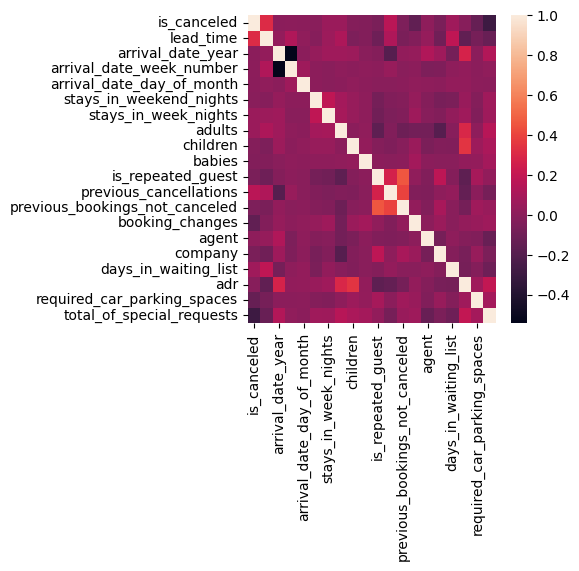

In [ ]:
city = hotel.loc[hotel["hotel"]=="City Hotel"]
print(type(city))
cancel_corr = city.corr()["is_canceled"]
cancel_corr = cancel_corr.sort_values(ascending=False)[1:]

sns.heatmap(city.corr())
print(cancel_corr)

            count      mean       std  min  25%  50%  75%  max
lead_time                                                     
0          3094.0  0.087912  0.283213  0.0  0.0  0.0  0.0  1.0
1          1859.0  0.124260  0.329967  0.0  0.0  0.0  0.0  1.0
2          1125.0  0.112000  0.315507  0.0  0.0  0.0  0.0  1.0
3          1020.0  0.116667  0.321180  0.0  0.0  0.0  0.0  1.0
4          1051.0  0.125595  0.331550  0.0  0.0  0.0  0.0  1.0
...           ...       ...       ...  ...  ...  ...  ...  ...
573          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
580          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
587          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
594          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
600         145.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

[447 rows x 8 columns]


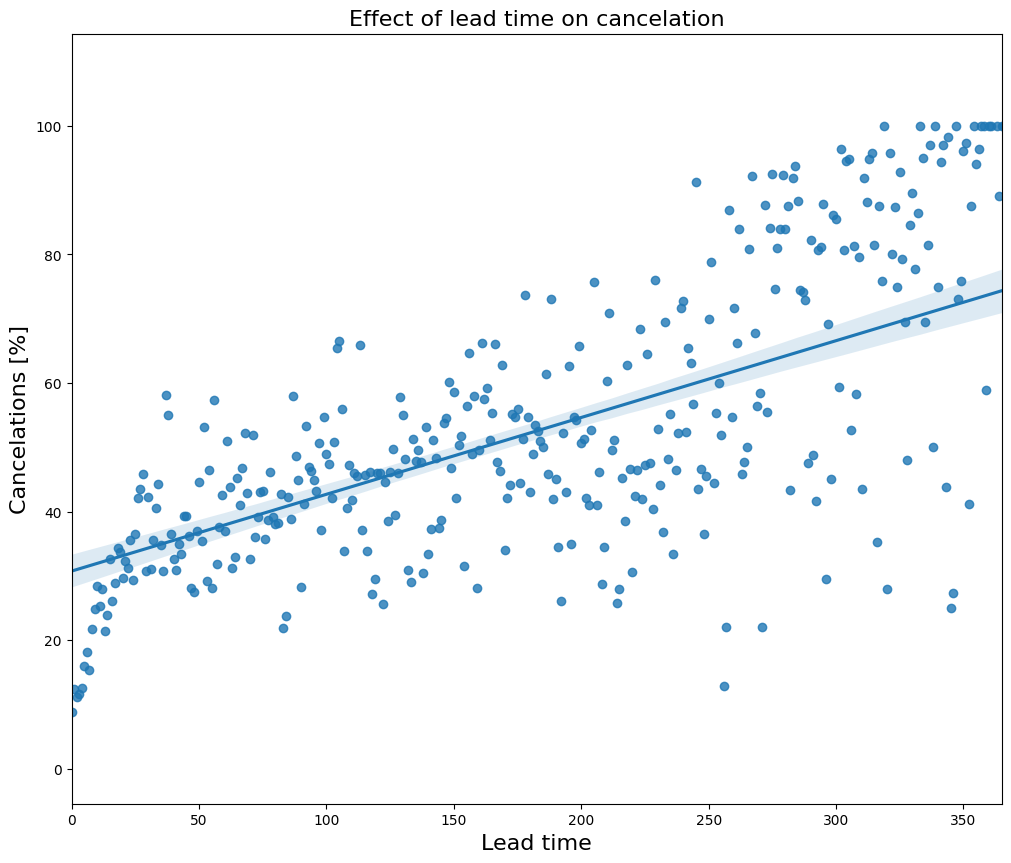

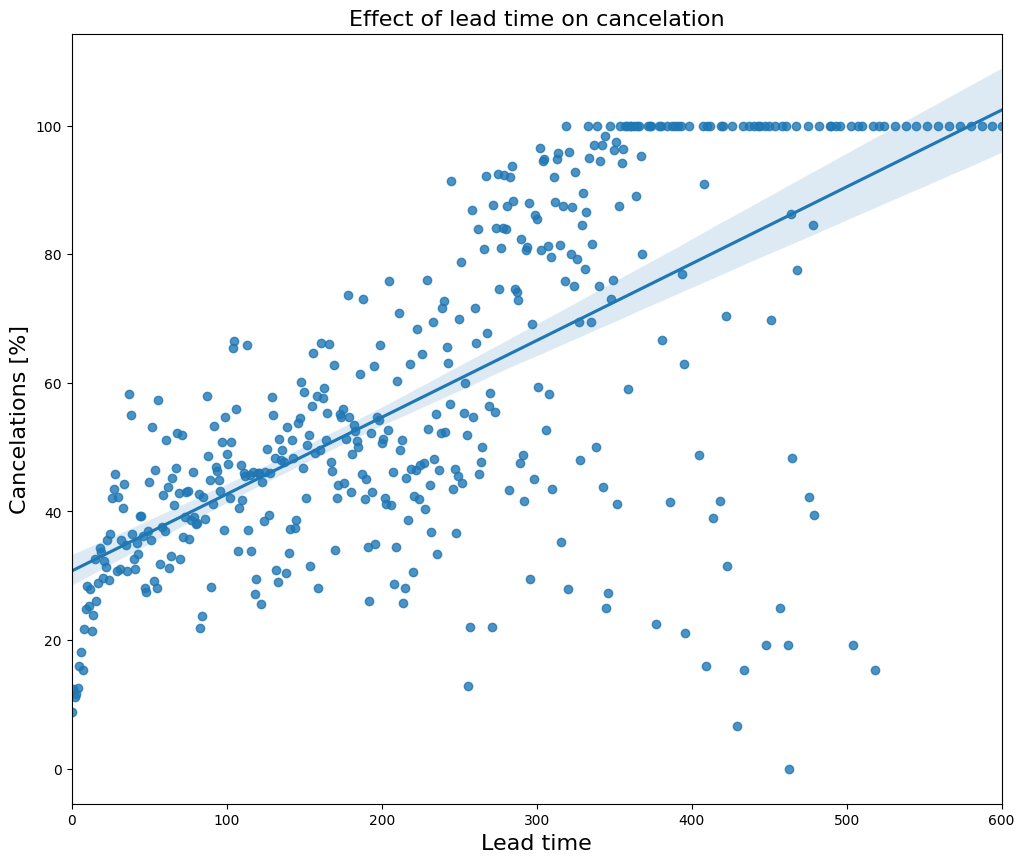

In [ ]:
lead_effect = city.groupby("lead_time")["is_canceled"].describe()
print(lead_effect)

plt.figure(figsize=(12, 10))

sns.regplot(x=lead_effect.index, y=lead_effect["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,365)
plt.show()

plt.figure(figsize=(12, 10))

sns.regplot(x=lead_effect.index, y=lead_effect["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,600)
plt.show()

                             count      mean       std  min  25%  50%  75%  \
total_of_special_requests                                                    
0                          47872.0  0.549695  0.497529  0.0  0.0  1.0  1.0   
1                          21362.0  0.220766  0.414773  0.0  0.0  0.0  0.0   
2                           8118.0  0.213969  0.410130  0.0  0.0  0.0  0.0   
3                           1584.0  0.175505  0.380519  0.0  0.0  0.0  0.0   
4                            197.0  0.106599  0.309389  0.0  0.0  0.0  0.0   
5                             26.0  0.038462  0.196116  0.0  0.0  0.0  0.0   

                           max  
total_of_special_requests       
0                          1.0  
1                          1.0  
2                          1.0  
3                          1.0  
4                          1.0  
5                          1.0  


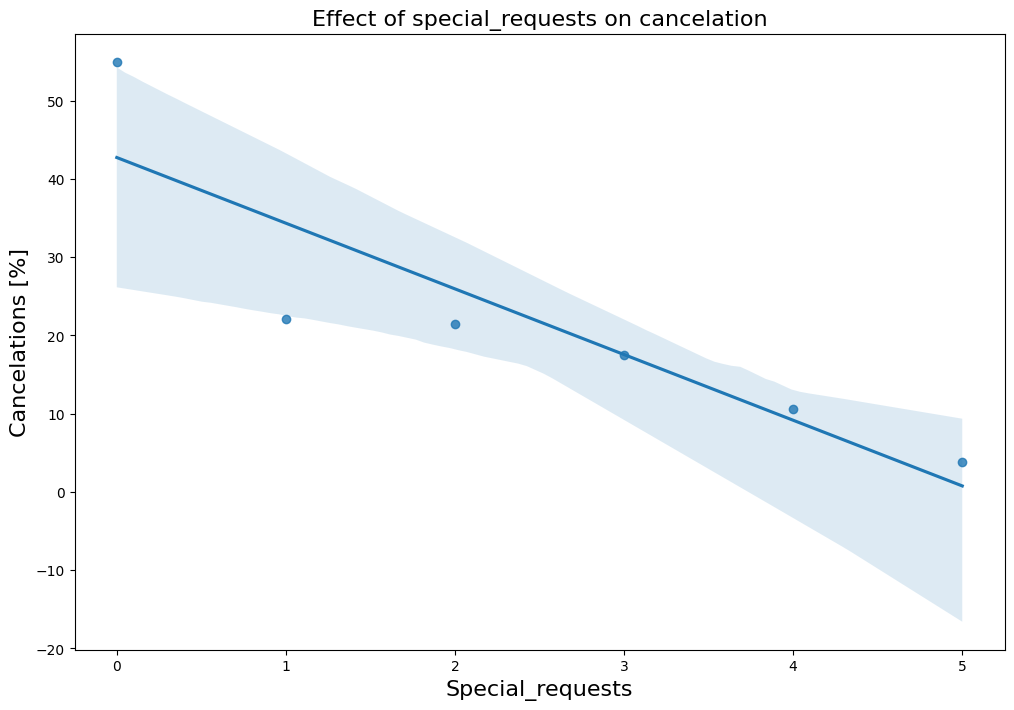

In [ ]:
request_effect = city.groupby("total_of_special_requests")["is_canceled"].describe()
print(request_effect)

plt.figure(figsize=(12, 8))

sns.regplot(x=request_effect.index, y=request_effect["mean"].values * 100)
plt.title("Effect of special_requests on cancelation", fontsize=16)
plt.xlabel("Special_requests", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

plt.show()
